In [1]:
import numpy as np 
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt
%matplotlib notebook

In [7]:
allData = pd.read_csv("journal.pone.0185912.s003.csv")
allData.head(10)

,Source,Site_source,Target,Site_target,Transfers,Year,Week
0,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2014,48
1,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,49
2,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,50
3,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2014,51
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1
5,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2015,2
6,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,3
7,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,5
8,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,6
9,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,8


In [13]:
allData['FullSourceName'] = allData.Source + allData.Site_source
allData['FullTargetName'] = allData.Target + allData.Site_target
allData['Transfer'] = allData.FullSourceName +'='+ allData.FullTargetName
allData['WeekFromStart'] = (allData.Year-2014)*52 + allData.Week - 48



allData.head(20)
np.unique(allData.WeekFromStart.values)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [14]:
allData['TimePeriod'] = (allData.WeekFromStart / 4).astype(int)
allData.head(20)

,Source,Site_source,Target,Site_target,Transfers,Year,Week,FullSourceName,FullTargetName,WeekFromStart,TimePeriod,Transfer
0,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2014,48,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,0,0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH
1,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,49,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,1,0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH
2,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2014,50,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,2,0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH
3,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2014,51,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,3,0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH
4,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,1,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,5,1,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH
5,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,1,2015,2,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,6,1,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH
6,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,3,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,7,1,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH
7,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,2,2015,5,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,9,2,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH
8,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,6,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,10,2,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH
9,AcuteMedicalUnit.EAU,PRUH,ChartwellUnit,PRUH,3,2015,8,AcuteMedicalUnit.EAUPRUH,ChartwellUnitPRUH,12,3,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH


In [21]:
reducedData = allData[['Transfer','Transfers','TimePeriod']]
reducedData.head(10)

,Transfer,Transfers,TimePeriod
0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,0
1,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,0
2,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,0
3,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,0
4,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,1
5,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,1
6,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,1
7,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,2
8,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,2
9,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,3


In [22]:
group = reducedData.groupby(['Transfer', 'TimePeriod'], as_index=False).sum()
group.head()

,Transfer,TimePeriod,Transfers
0,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,0,8
1,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,1,5
2,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,2,5
3,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,3,10
4,AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH,4,11


In [24]:
ACU2CUtransfers = group[group['Transfer']=='AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH'].Transfers.values
ACU2CUtimePeriod = group[group['Transfer']=='AcuteMedicalUnit.EAUPRUH=ChartwellUnitPRUH'].TimePeriod.values

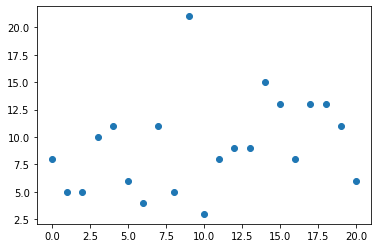

In [28]:
plt.scatter(ACU2CUtimePeriod,ACU2CUtransfers)
plt.show()

In [ ]:
allData.Site